# data preparation


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

df=pd.read_csv("totalconsmp.csv",header=0,infer_datetime_format=True,parse_dates=['occurtime'],index_col=['occurtime'])


In [ ]:
df.head()

,power
occurtime,
2020-12-10 00:00:00,0.00
2020-12-10 00:05:00,130.16
2020-12-10 00:10:00,124.64
2020-12-10 00:15:00,121.36
2020-12-10 00:20:00,120.16


In [ ]:
df.tail()

,power
occurtime,
2021-02-18 11:30:00,13.68
2021-02-18 11:40:00,0.28
2021-02-18 11:45:00,0.27
2021-02-18 11:50:00,0.00
2021-02-18 11:55:00,0.00


In [ ]:
df.index

DatetimeIndex(['2020-12-10 00:00:00', '2020-12-10 00:05:00',
               '2020-12-10 00:10:00', '2020-12-10 00:15:00',
               '2020-12-10 00:20:00', '2020-12-10 00:25:00',
               '2020-12-10 00:30:00', '2020-12-10 00:35:00',
               '2020-12-10 00:40:00', '2020-12-10 00:45:00',
               ...
               '2021-02-18 11:05:00', '2021-02-18 11:10:00',
               '2021-02-18 11:15:00', '2021-02-18 11:20:00',
               '2021-02-18 11:25:00', '2021-02-18 11:30:00',
               '2021-02-18 11:40:00', '2021-02-18 11:45:00',
               '2021-02-18 11:50:00', '2021-02-18 11:55:00'],
              dtype='datetime64[ns]', name='occurtime', length=19681, freq=None)

In [ ]:

#df=df.iloc[192:]
#df.head(288)
#df.tail()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19681 entries, 2020-12-10 00:00:00 to 2021-02-18 11:55:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   power   19681 non-null  float64
dtypes: float64(1)
memory usage: 307.5 KB


In [ ]:
#resample time to days
daily_data=df.resample('D').sum()

In [ ]:
#df['occurtime'] = pd.to_datetime(df['occurtime'],format="%Y-%m-%d_%H:%M:%S")



#df.to_csv('totalconsmp.csv',index=False,date_format="%Y-%m-%d %H:%M:%S")

In [ ]:
daily_data.head()

,power
occurtime,
2020-12-10,21980.39
2020-12-11,16564.25
2020-12-12,20359.33
2020-12-13,21630.15
2020-12-14,22984.32


In [ ]:
daily_data.describe()

,power
count,71.000000
mean,19206.970141
std,7950.674991
min,0.000000
25%,16912.785000
50%,20717.400000
75%,21960.895000
max,55357.790000


In [ ]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 71 entries, 2020-12-10 to 2021-02-18
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   power   71 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


## Step 2: Visualize the Data

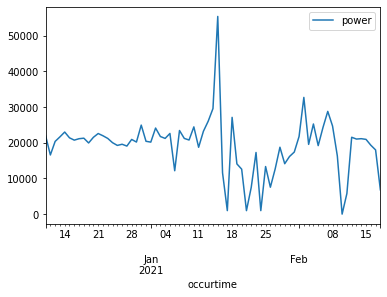

In [ ]:
daily_data.plot()

## Remove outliers

In [ ]:
# calculate summary statistics
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
data_mean, data_std = mean(daily_data['power']), std(daily_data['power'])
print(data_mean,data_std)

19206.97014084508 7894.485770958332


In [ ]:
# identify outliers
#std = 1
cut_off = data_std * 1
lower, upper = data_mean - cut_off, data_mean + cut_off
print(lower,upper)
# number of outliers and their vals outliers
outliers = [x for x in daily_data['power'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
print(outliers)

11312.484369886746 27101.45591180341
Identified outliers: 12
[29565.659999999996, 55357.79000000021, 977.8600000000038, 973.850000000003, 7497.389999999998, 977.1200000000038, 7533.279999999955, 32686.88, 28766.490000000005, 0.0, 5776.3099999999995, 6791.589999999999]


In [ ]:
# number of readings left that are non outliers
outliers_removed = [x for x in daily_data['power'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))
print(outliers_removed)

Non-outlier observations: 59
[21980.39, 16564.25, 20359.33000000001, 21630.149999999998, 22984.32, 21369.119999999988, 20717.399999999994, 21118.589999999997, 21263.6, 19928.1, 21510.460000000006, 22568.859999999993, 21941.4, 21195.960000000003, 20004.24999999998, 19242.25999999999, 19563.80999999999, 19054.960000000006, 20913.59999999999, 20184.48000000001, 24927.59999999999, 20394.389999999992, 20161.920000000006, 24102.479999999978, 21732.16000000001, 21201.84, 22588.4, 12147.120000000004, 23415.839999999997, 21201.59999999999, 20751.440000000006, 24429.27999999998, 18716.240000000005, 23198.239999999983, 26016.080000000024, 11568.960000000023, 27097.860000000008, 14065.640000000014, 12585.700000000015, 17261.320000000007, 13322.890000000069, 12632.880000000001, 18732.24, 14115.439999999999, 16133.919999999998, 17383.520000000004, 21739.68, 19527.040000000005, 25239.500000000004, 19183.520000000004, 24265.59999999999, 24672.97, 16307.28, 21522.309999999998, 21021.599999999984, 21124

In [ ]:
#removing the outliers
#daily_data_filtered
#one std
#59 records left
daily_data_filtered=daily_data[(daily_data.power>=lower)&(daily_data.power<=upper)]
daily_data_filtered.shape
#print(daily_data_filtered)

(59, 1)

In [ ]:
#removing the outliers
#daily_data_filtered_1_5 
#1.5 std
#59 records left same as std=1
cut_off = data_std * 1.5
lower_1_5, upper_1_5 = data_mean - cut_off, data_mean + cut_off
daily_data_filtered_1_5=daily_data[(daily_data.power>=lower)&(daily_data.power<=upper)]
daily_data_filtered_1_5.shape
print(lower_1_5,upper_1_5,daily_data_filtered_1_5)

7365.241484407579 31048.698797282577                power
occurtime           
2020-12-10  21980.39
2020-12-11  16564.25
2020-12-12  20359.33
2020-12-13  21630.15
2020-12-14  22984.32
2020-12-15  21369.12
2020-12-16  20717.40
2020-12-17  21118.59
2020-12-18  21263.60
2020-12-19  19928.10
2020-12-20  21510.46
2020-12-21  22568.86
2020-12-22  21941.40
2020-12-23  21195.96
2020-12-24  20004.25
2020-12-25  19242.26
2020-12-26  19563.81
2020-12-27  19054.96
2020-12-28  20913.60
2020-12-29  20184.48
2020-12-30  24927.60
2020-12-31  20394.39
2021-01-01  20161.92
2021-01-02  24102.48
2021-01-03  21732.16
2021-01-04  21201.84
2021-01-05  22588.40
2021-01-06  12147.12
2021-01-07  23415.84
2021-01-08  21201.60
2021-01-09  20751.44
2021-01-10  24429.28
2021-01-11  18716.24
2021-01-12  23198.24
2021-01-13  26016.08
2021-01-16  11568.96
2021-01-18  27097.86
2021-01-19  14065.64
2021-01-20  12585.70
2021-01-23  17261.32
2021-01-25  13322.89
2021-01-27  12632.88
2021-01-28  18732.24
2021-01-29  14115.

In [ ]:
#removing the outliers
#daily_data_filtered_2 
#2 std
#59 records left same as std=1 and std=1.5
cut_off = data_std * 2
lower_2, upper_2 = data_mean - cut_off, data_mean + cut_off
daily_data_filtered_2=daily_data[(daily_data.power>=lower)&(daily_data.power<=upper)]
daily_data_filtered_2.shape
print(lower_2,upper_2,daily_data_filtered_2)

3417.998598928414 34995.94168276174                power
occurtime           
2020-12-10  21980.39
2020-12-11  16564.25
2020-12-12  20359.33
2020-12-13  21630.15
2020-12-14  22984.32
2020-12-15  21369.12
2020-12-16  20717.40
2020-12-17  21118.59
2020-12-18  21263.60
2020-12-19  19928.10
2020-12-20  21510.46
2020-12-21  22568.86
2020-12-22  21941.40
2020-12-23  21195.96
2020-12-24  20004.25
2020-12-25  19242.26
2020-12-26  19563.81
2020-12-27  19054.96
2020-12-28  20913.60
2020-12-29  20184.48
2020-12-30  24927.60
2020-12-31  20394.39
2021-01-01  20161.92
2021-01-02  24102.48
2021-01-03  21732.16
2021-01-04  21201.84
2021-01-05  22588.40
2021-01-06  12147.12
2021-01-07  23415.84
2021-01-08  21201.60
2021-01-09  20751.44
2021-01-10  24429.28
2021-01-11  18716.24
2021-01-12  23198.24
2021-01-13  26016.08
2021-01-16  11568.96
2021-01-18  27097.86
2021-01-19  14065.64
2021-01-20  12585.70
2021-01-23  17261.32
2021-01-25  13322.89
2021-01-27  12632.88
2021-01-28  18732.24
2021-01-29  14115.4

In [ ]:
#removing the outliers
#daily_data_filtered_3
#3 std
#59 records left same as std=1 ,1.5 and 2
cut_off = data_std * 3
lower_3, upper_3 = data_mean - cut_off, data_mean + cut_off
daily_data_filtered_3=daily_data[(daily_data.power>=lower)&(daily_data.power<=upper)]
daily_data_filtered_3.shape
print(lower_3,upper_3,daily_data_filtered_3)

-4476.48717202992 42890.427453720076                power
occurtime           
2020-12-10  21980.39
2020-12-11  16564.25
2020-12-12  20359.33
2020-12-13  21630.15
2020-12-14  22984.32
2020-12-15  21369.12
2020-12-16  20717.40
2020-12-17  21118.59
2020-12-18  21263.60
2020-12-19  19928.10
2020-12-20  21510.46
2020-12-21  22568.86
2020-12-22  21941.40
2020-12-23  21195.96
2020-12-24  20004.25
2020-12-25  19242.26
2020-12-26  19563.81
2020-12-27  19054.96
2020-12-28  20913.60
2020-12-29  20184.48
2020-12-30  24927.60
2020-12-31  20394.39
2021-01-01  20161.92
2021-01-02  24102.48
2021-01-03  21732.16
2021-01-04  21201.84
2021-01-05  22588.40
2021-01-06  12147.12
2021-01-07  23415.84
2021-01-08  21201.60
2021-01-09  20751.44
2021-01-10  24429.28
2021-01-11  18716.24
2021-01-12  23198.24
2021-01-13  26016.08
2021-01-16  11568.96
2021-01-18  27097.86
2021-01-19  14065.64
2021-01-20  12585.70
2021-01-23  17261.32
2021-01-25  13322.89
2021-01-27  12632.88
2021-01-28  18732.24
2021-01-29  14115.

In [ ]:
#removing outliers 
# 3 std
#new_df
#70 records left
from scipy import stats
z_scores = stats.zscore(daily_data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = daily_data[filtered_entries]

print(new_df)


               power
occurtime           
2020-12-10  21980.39
2020-12-11  16564.25
2020-12-12  20359.33
2020-12-13  21630.15
2020-12-14  22984.32
...              ...
2021-02-14  21124.72
2021-02-15  20928.51
2021-02-16  19299.25
2021-02-17  17978.39
2021-02-18   6791.59

[70 rows x 1 columns]


### Testing For Stationarity



In [ ]:
from statsmodels.tsa.stattools import adfuller
#test_result=adfuller(daily_data['power'])
test_result=adfuller(new_df['power'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(readings):
    result=adfuller(readings)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [ ]:
#adfuller_test(daily_data['power'])
adfuller_test(new_df['power'])

ADF Test Statistic : -2.688490184824719
p-value : 0.0760512345252914
#Lags Used : 5
Number of Observations Used : 64
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [ ]:
#daily_data['power First Difference'] = daily_data['power'] - daily_data['power'].shift(1)
new_df['power First Difference'] = new_df['power'] - new_df['power'].shift(1)
daily_data_filtered['power First Difference'] = daily_data_filtered['power'] - daily_data_filtered['power'].shift(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#daily_data['power'].shift(1)
new_df['power'].shift(1)
daily_data_filtered['power'].shift(1)

occurtime
2020-12-10         NaN
2020-12-11    21980.39
2020-12-12    16564.25
2020-12-13    20359.33
2020-12-14    21630.15
2020-12-15    22984.32
2020-12-16    21369.12
2020-12-17    20717.40
2020-12-18    21118.59
2020-12-19    21263.60
2020-12-20    19928.10
2020-12-21    21510.46
2020-12-22    22568.86
2020-12-23    21941.40
2020-12-24    21195.96
2020-12-25    20004.25
2020-12-26    19242.26
2020-12-27    19563.81
2020-12-28    19054.96
2020-12-29    20913.60
2020-12-30    20184.48
2020-12-31    24927.60
2021-01-01    20394.39
2021-01-02    20161.92
2021-01-03    24102.48
2021-01-04    21732.16
2021-01-05    21201.84
2021-01-06    22588.40
2021-01-07    12147.12
2021-01-08    23415.84
2021-01-09    21201.60
2021-01-10    20751.44
2021-01-11    24429.28
2021-01-12    18716.24
2021-01-13    23198.24
2021-01-16    26016.08
2021-01-18    11568.96
2021-01-19    27097.86
2021-01-20    14065.64
2021-01-23    12585.70
2021-01-25    17261.32
2021-01-27    13322.89
2021-01-28    12632.88
2

In [ ]:
#daily_data['Seasonal First Difference']=daily_data['power']-daily_data['power'].shift(12)

In [ ]:
#daily_data.head(14)
new_df.head(14)

,power,power First Difference
occurtime,,
2020-12-10,21980.39,NaN
2020-12-11,16564.25,-5416.14
2020-12-12,20359.33,3795.08
2020-12-13,21630.15,1270.82
2020-12-14,22984.32,1354.17
2020-12-15,21369.12,-1615.20
2020-12-16,20717.40,-651.72
2020-12-17,21118.59,401.19
2020-12-18,21263.60,145.01


In [ ]:
## Again test dickey fuller test
#adfuller_test(daily_data['power First Difference'].dropna())
adfuller_test(new_df['power First Difference'].dropna())
print('---------------')
adfuller_test(daily_data_filtered['power First Difference'].dropna())

ADF Test Statistic : -4.530792886993197
p-value : 0.0001729251551130496
#Lags Used : 5
Number of Observations Used : 63
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
---------------
ADF Test Statistic : -12.001556523948285
p-value : 3.337388637468223e-22
#Lags Used : 1
Number of Observations Used : 56
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


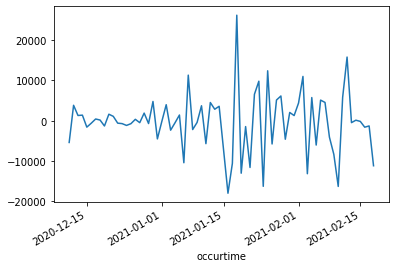

In [ ]:
#daily_data['power First Difference']=daily_data['power First Difference'].dropna()
#daily_data['power First Difference'].plot()
new_df['power First Difference']=new_df['power First Difference'].dropna()
new_df['power First Difference'].plot()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


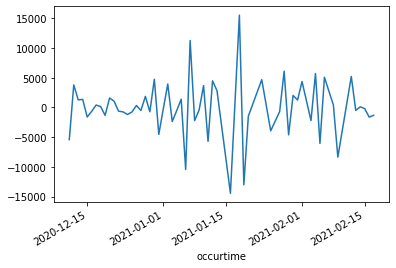

In [ ]:
daily_data_filtered['power First Difference']=daily_data_filtered['power First Difference'].dropna()
daily_data_filtered['power First Difference'].plot()

arima model

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima

In [ ]:
import warnings
warnings.filterwarnings('ignore')

1-arima using new_df

In [ ]:
new_df.head()

,power,power First Difference
occurtime,,
2020-12-10,21980.39,NaN
2020-12-11,16564.25,-5416.14
2020-12-12,20359.33,3795.08
2020-12-13,21630.15,1270.82
2020-12-14,22984.32,1354.17


In [ ]:
#stepwise_fit=auto_arima(daily_data['power First Difference'].dropna(),trace=True,supress_warnings=True)
stepwise_fit=auto_arima(new_df['power First Difference'].dropna(),trace=True,supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1428.760, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1422.914, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1413.966, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1426.822, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1410.965, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1415.950, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1414.043, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1420.112, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1410.489, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1411.778, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1420.975, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1412.414, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1

In [ ]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   69
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -702.245
Date:                Sun, 28 Mar 2021   AIC                           1410.489
Time:                        21:40:56   BIC                           1417.191
Sample:                             0   HQIC                          1413.148
                                 - 69                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3669      0.110      3.341      0.001       0.152       0.582
ma.L1         -0.9470      0.059    -15.947      0.000      -1.063      -0.831
sigma2      4.474e+07    1.7e-10   2.64e+17      0.000    4.47e+07    4.47e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                11.46
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):              12.99   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.4e+33. Standard errors may be unstable.
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#train=daily_data.iloc[:45]
#test=daily_data.iloc[45:]
#print(train.shape,test.shape)
n_train=new_df.iloc[:41]
n_test=new_df.iloc[41:]
print(train.shape,test.shape)

(41, 2) (28, 2)


In [ ]:
#daily_data.head()
new_df.head()


,power,power First Difference
occurtime,,
2020-12-10,21980.39,NaN
2020-12-11,16564.25,-5416.14
2020-12-12,20359.33,3795.08
2020-12-13,21630.15,1270.82
2020-12-14,22984.32,1354.17


In [ ]:
#daily_data=daily_data.iloc[1:]
new_df=new_df.iloc[1:]

In [ ]:
new_df.head()


,power,power First Difference
occurtime,,
2020-12-11,16564.25,-5416.14
2020-12-12,20359.33,3795.08
2020-12-13,21630.15,1270.82
2020-12-14,22984.32,1354.17
2020-12-15,21369.12,-1615.20


In [ ]:
#train=daily_data.iloc[:45]
#test=daily_data.iloc[45:]
#print(train.shape,test.shape)
n_train=new_df.iloc[:41]
n_test=new_df.iloc[41:]
print(train.shape,test.shape)

(41, 2) (28, 2)


In [ ]:
n_test.head()

,power,power First Difference
occurtime,,
2021-01-22,7497.39,6523.54
2021-01-23,17261.32,9763.93
2021-01-24,977.12,-16284.20
2021-01-25,13322.89,12345.77
2021-01-26,7533.28,-5789.61


In [ ]:
#whyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy
n_model=ARIMA(n_train['power First Difference'].dropna(),order=(1,0,1))
n_model=n_model.fit()
n_model.summary()

ValueError: ignored

               power  power First Difference
occurtime                                   
2021-01-22   7497.39                 6523.54
2021-01-23  17261.32                 9763.93
2021-01-24    977.12               -16284.20
2021-01-25  13322.89                12345.77
2021-01-26   7533.28                -5789.61
2021-01-27  12632.88                 5099.60
2021-01-28  18732.24                 6099.36
2021-01-29  14115.44                -4616.80
2021-01-30  16133.92                 2018.48
2021-01-31  17383.52                 1249.60
2021-02-01  21739.68                 4356.16
2021-02-02  32686.88                10947.20
2021-02-03  19527.04               -13159.84
2021-02-04  25239.50                 5712.46
2021-02-05  19183.52                -6055.98
2021-02-06  24265.60                 5082.08
2021-02-07  28766.49                 4500.89
2021-02-08  24672.97                -4093.52
2021-02-09  16307.28                -8365.69
2021-02-10      0.00               -16307.28
2021-02-11

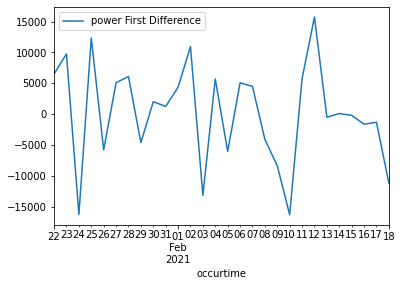

In [ ]:
n_test['power First Difference'].plot(legend=True)
print(n_test)

In [ ]:
n_start=len(n_train)
n_end=len(n_train)+len(n_test)-1
n_pred=n_model.predict(start=n_start,end=n_end,typ='levels')
print(n_pred)
#predd=abs(pred)
#print(predd)

TypeError: ignored

In [ ]:
### whyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy
n_pred.plot(figsize=(12,5),legend=True)
n_test['power First Difference'].plot(figsize=(12,5),legend=True)

NameError: ignored

In [ ]:
n_pred.plot(figsize=(12,5),legend=True)


NameError: ignored

In [ ]:
n_test['power First Difference'].mean()

207.7764285714285

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
n_rmse=sqrt(mean_squared_error(n_pred,n_test['power First Difference']))
print(n_rmse)

NameError: ignored

In [ ]:
#when i use daily_data['power first difference] it causes an error,, so am i supposed to use 'power' or 'power first difference'!
#model2=ARIMA(daily_data['power'],order=(3,0,3))
#model2=model2.fit()
#daily_data.tail()
n_model2=ARIMA(new_df['power First Difference'],order=(1,0,1))
n_model2=n_model2.fit()
new_df.tail()

,power,power First Difference
occurtime,,
2021-02-14,21124.72,103.12
2021-02-15,20928.51,-196.21
2021-02-16,19299.25,-1629.26
2021-02-17,17978.39,-1320.86
2021-02-18,6791.59,-11186.80


In [ ]:
#index_future_dates=pd.date_range(start='2021-02-18',end='2021-02-28')
#index_future_dates=pd.date_range(start='2021-02-18',end='2021-02-18')
index_future_dates=pd.date_range(start='2021-02-18',end='2021-02-28')
#print(len(index_future_dates))
fn_pred=n_model2.predict(start=len(new_df),end=len(new_df)+10,typ='levels').rename('arima preds')
fn_pred.index=index_future_dates
print(fn_pred)

2021-02-18    5654.151967
2021-02-19    2036.580684
2021-02-20     699.175474
2021-02-21     204.740795
2021-02-22      21.949783
2021-02-23     -45.627504
2021-02-24     -70.610623
2021-02-25     -79.846807
2021-02-26     -83.261397
2021-02-27     -84.523760
2021-02-28     -84.990452
Freq: D, Name: arima preds, dtype: float64


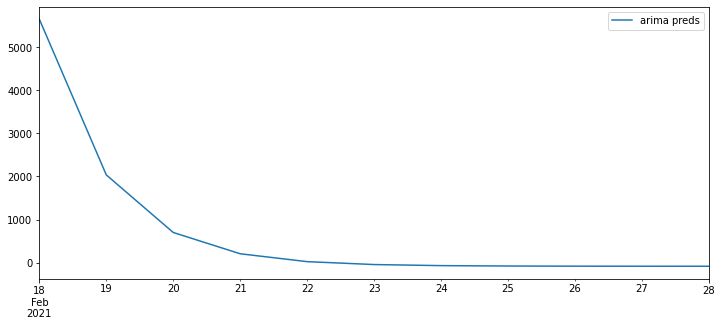

In [ ]:
fn_pred.plot(figsize=(12,5),legend=True)

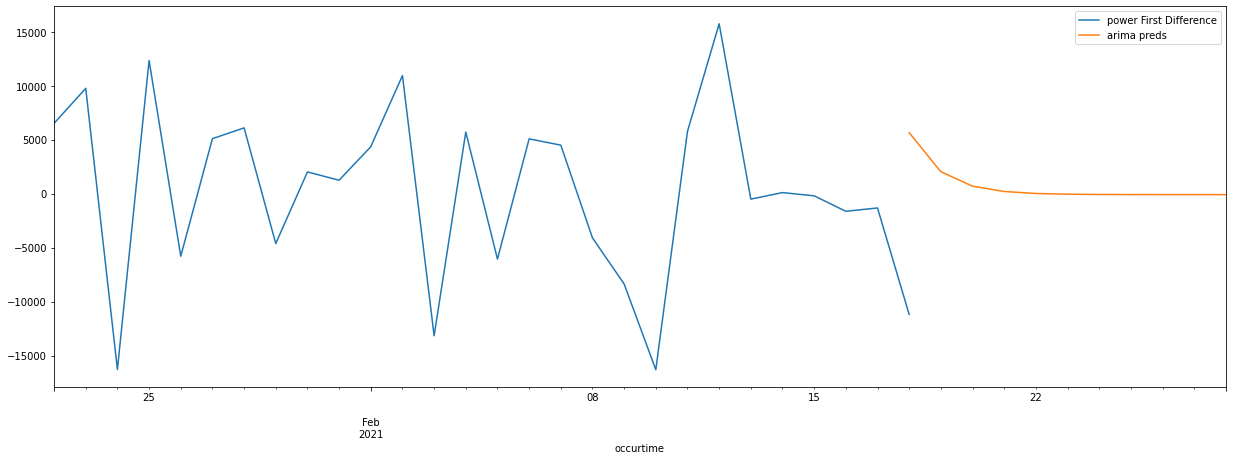

In [ ]:
n_test['power First Difference'].plot(figsize=(21,7),legend=True)
fn_pred.plot(figsize=(21,7),legend=True)



2-arima using daily_data_filtered

In [ ]:
daily_data_filtered.head()

,power,power First Difference
occurtime,,
2020-12-10,21980.39,NaN
2020-12-11,16564.25,-5416.14
2020-12-12,20359.33,3795.08
2020-12-13,21630.15,1270.82
2020-12-14,22984.32,1354.17


In [ ]:
stepwise_fit=auto_arima(daily_data_filtered['power First Difference'].dropna(),trace=True,supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1111.407, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1154.121, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1126.072, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1119.906, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1152.132, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1116.026, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1109.886, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1117.430, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1108.899, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1109.660, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1111.642, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1106.900, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1124.073, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1107.658, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]          

In [ ]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   58
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -550.450
Date:                Sun, 28 Mar 2021   AIC                           1106.900
Time:                        21:50:47   BIC                           1113.081
Sample:                             0   HQIC                          1109.308
                                 - 58                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9769      0.102     -9.622      0.000      -1.176      -0.778
ar.L2         -0.5280      0.090     -5.864      0.000      -0.704      -0.352
sigma2      1.018e+07   3.54e-09   2.88e+15      0.000    1.02e+07    1.02e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 7.13
Prob(Q):                              0.57   Prob(JB):                         0.03
Heteroskedasticity (H):               2.65   Skew:                            -0.68
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
d_train=daily_data_filtered.iloc[:41]
d_test=daily_data_filtered.iloc[41:]
print(d_train.shape,d_test.shape)

(41, 2) (18, 2)


In [ ]:
daily_data_filtered.head()


,power,power First Difference
occurtime,,
2020-12-10,21980.39,NaN
2020-12-11,16564.25,-5416.14
2020-12-12,20359.33,3795.08
2020-12-13,21630.15,1270.82
2020-12-14,22984.32,1354.17


In [ ]:
daily_data_filtered=daily_data_filtered.iloc[1:]

In [ ]:
daily_data_filtered.head()


,power,power First Difference
occurtime,,
2020-12-11,16564.25,-5416.14
2020-12-12,20359.33,3795.08
2020-12-13,21630.15,1270.82
2020-12-14,22984.32,1354.17
2020-12-15,21369.12,-1615.20


In [ ]:
d_train=daily_data_filtered.iloc[:41]
d_test=daily_data_filtered.iloc[41:]
print(d_train.shape,d_test.shape)

(41, 2) (17, 2)


In [ ]:
d_test.head()

,power,power First Difference
occurtime,,
2021-01-28,18732.24,6099.36
2021-01-29,14115.44,-4616.80
2021-01-30,16133.92,2018.48
2021-01-31,17383.52,1249.60
2021-02-01,21739.68,4356.16


In [ ]:
d_model=ARIMA(d_train['power First Difference'].dropna(),order=(2,0,0))
d_model=d_model.fit()
d_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARMA Model Results                                
==================================================================================
Dep. Variable:     power First Difference   No. Observations:                   41
Model:                         ARMA(2, 0)   Log Likelihood                -389.227
Method:                           css-mle   S.D. of innovations           3157.837
Date:                    Sun, 28 Mar 2021   AIC                            786.454
Time:                            21:52:47   BIC                            793.308
Sample:                                 0   HQIC                           788.950
                                                                                  
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         -141.0277    192.893     -0.731      0.465    -519.092     237.037
ar.L1.power First Difference    -1.0326      0.125     -8.259      0.000      -1.278      -0.788
ar.L2.power First Difference    -0.5789      0.124     -4.685      0.000      -0.821      -0.337
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8918           -0.9654j            1.3143           -0.3687
AR.2           -0.8918           +0.9654j            1.3143            0.3687
-----------------------------------------------------------------------------
"""

               power  power First Difference
occurtime                                   
2021-01-28  18732.24                 6099.36
2021-01-29  14115.44                -4616.80
2021-01-30  16133.92                 2018.48
2021-01-31  17383.52                 1249.60
2021-02-01  21739.68                 4356.16
2021-02-03  19527.04                -2212.64
2021-02-04  25239.50                 5712.46
2021-02-05  19183.52                -6055.98
2021-02-06  24265.60                 5082.08
2021-02-08  24672.97                  407.37
2021-02-09  16307.28                -8365.69
2021-02-12  21522.31                 5215.03
2021-02-13  21021.60                 -500.71
2021-02-14  21124.72                  103.12
2021-02-15  20928.51                 -196.21
2021-02-16  19299.25                -1629.26
2021-02-17  17978.39                -1320.86


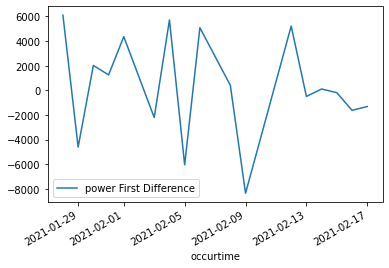

In [ ]:
d_test['power First Difference'].plot(legend=True)
print(d_test)

In [ ]:
d_start=len(d_train)
d_end=len(d_train)+len(d_test)-1
d_pred=d_model.predict(start=d_start,end=d_end,typ='levels')
print(d_pred)

41    2624.213572
42   -2678.487335
43     878.201958
44     275.538364
45   -1161.207105
46     671.210501
47    -389.111479
48    -355.085688
49     223.620112
50    -393.626056
51     -91.306002
52     -46.134473
53    -267.795264
54     -65.067974
55    -146.072498
56    -179.792998
57     -98.079609
dtype: float64


In [ ]:
d_pred.plot(figsize=(12,5),legend=True)
d_test['power First Difference'].plot(figsize=(12,5),legend=True)

ValueError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fcdbf0a5950> (for post_execute):


ValueError: ignored

ValueError: ignored

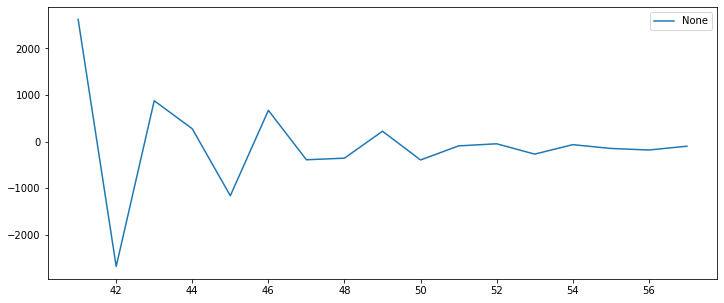

In [ ]:
d_pred.plot(figsize=(12,5),legend=True)


In [ ]:
d_test['power First Difference'].mean()

314.44176470588246

In [ ]:
d_rmse=sqrt(mean_squared_error(d_pred,d_test['power First Difference']))
print(d_rmse)

3839.7513611009194


In [ ]:
d_model2=ARIMA(daily_data_filtered['power First Difference'],order=(2,0,0))
d_model2=d_model2.fit()
daily_data_filtered.tail()

,power,power First Difference
occurtime,,
2021-02-13,21021.60,-500.71
2021-02-14,21124.72,103.12
2021-02-15,20928.51,-196.21
2021-02-16,19299.25,-1629.26
2021-02-17,17978.39,-1320.86


In [ ]:
#index_future_dates=pd.date_range(start='2021-02-18',end='2021-02-28')
#index_future_dates=pd.date_range(start='2021-02-18',end='2021-02-18')
index_future_dates=pd.date_range(start='2021-02-18',end='2021-02-28')
#print(len(index_future_dates))
fd_pred=d_model2.predict(start=len(daily_data_filtered),end=len(daily_data_filtered)+10,typ='levels').rename('arima preds')
fd_pred.index=index_future_dates
print(fd_pred)

2021-02-18    2132.864688
2021-02-19   -1404.560086
2021-02-20     227.569738
2021-02-21     501.257044
2021-02-22    -628.211862
2021-02-23     330.803546
2021-02-24      -9.660676
2021-02-25    -183.534908
2021-02-26     166.178675
2021-02-27     -83.679587
2021-02-28     -24.261747
Freq: D, Name: arima preds, dtype: float64


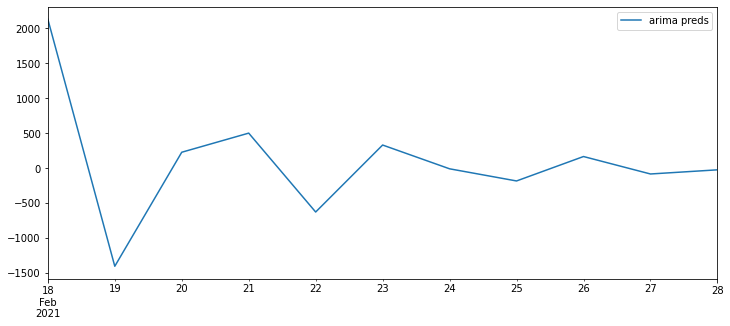

In [ ]:
fd_pred.plot(figsize=(12,5),legend=True)

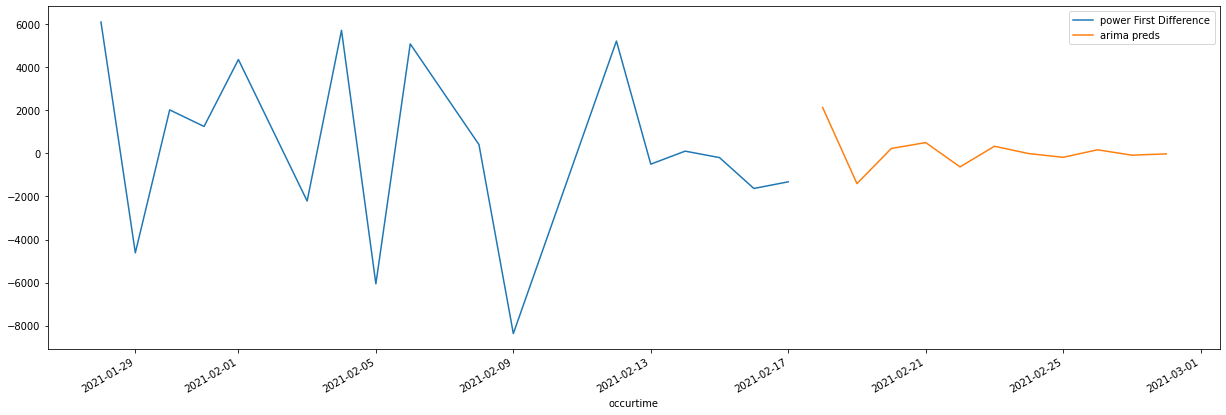

In [ ]:
d_test['power First Difference'].plot(figsize=(21,7),legend=True)
fd_pred.plot(figsize=(21,7),legend=True)

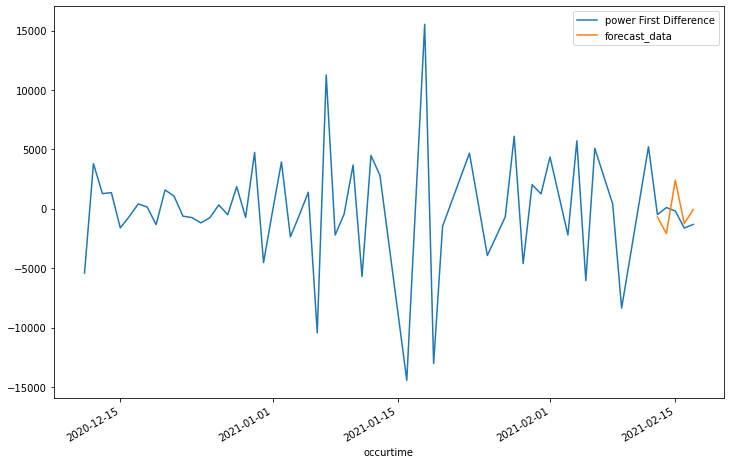

In [ ]:
daily_data_filtered['forecast_data'] = d_model2.predict(start='2021-02-13',end='2021-02-17', dynamic= True)  
daily_data_filtered [['power First Difference','forecast_data']]. plot (figsize= (12,8))

moving avg

In [155]:
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(d_train['power First Difference'], order=(0,1))
res = mod.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARMA Model Results                                
==================================================================================
Dep. Variable:     power First Difference   No. Observations:                   41
Model:                         ARMA(0, 1)   Log Likelihood                -394.877
Method:                           css-mle   S.D. of innovations           3521.431
Date:                    Sun, 28 Mar 2021   AIC                            795.754
Time:                            23:32:55   BIC                            800.894
Sample:                                 0   HQIC                           797.626
                                                                                  
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -92.6210     44.829     -2.066      0.039    -180.484      -4.758
ma.L1.power First Difference    -1.0000      0.255     -3.917      0.000      -1.500      -0.500
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [157]:
d_train.tail()

,power,power First Difference
occurtime,,
2021-01-19,14065.64,-13032.22
2021-01-20,12585.70,-1479.94
2021-01-23,17261.32,4675.62
2021-01-25,13322.89,-3938.43
2021-01-27,12632.88,-690.01


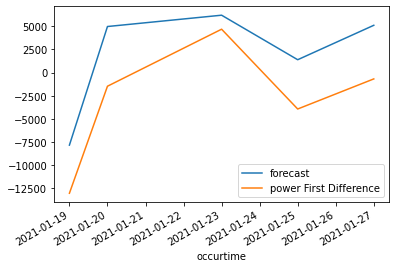

In [156]:
res.plot_predict(start='2021-01-19', end='2021-01-27')
plt.show()

In [158]:
res.aic

795.7536803035111

790.1512554269872


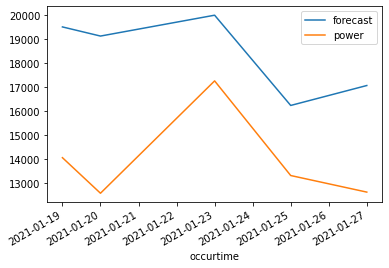

In [161]:
mod = ARMA(d_train['power'], order=(0,3))
res = mod.fit()
res.summary()
print(res.aic)
res.plot_predict(start='2021-01-19', end='2021-01-27')
plt.show()

In [162]:
mod = ARMA(d_train['power'], order=(0,3))
res = mod.fit()
res.summary()
res.aic

790.1512554269872

In [163]:
mod = ARMA(d_train['power'], order=(0,2))
res = mod.fit()
res.summary()
res.aic

790.4542973512416

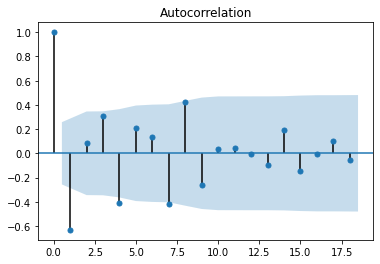

In [165]:
from statsmodels.graphics.tsaplots import plot_acf
acf = plot_acf(daily_data_filtered["power First Difference"].dropna())

In [ ]:
daily_data_filtered['power'].rolling(window=2).mean()

occurtime
2020-12-11          NaN
2020-12-12    18461.790
2020-12-13    20994.740
2020-12-14    22307.235
2020-12-15    22176.720
2020-12-16    21043.260
2020-12-17    20917.995
2020-12-18    21191.095
2020-12-19    20595.850
2020-12-20    20719.280
2020-12-21    22039.660
2020-12-22    22255.130
2020-12-23    21568.680
2020-12-24    20600.105
2020-12-25    19623.255
2020-12-26    19403.035
2020-12-27    19309.385
2020-12-28    19984.280
2020-12-29    20549.040
2020-12-30    22556.040
2020-12-31    22660.995
2021-01-01    20278.155
2021-01-02    22132.200
2021-01-03    22917.320
2021-01-04    21467.000
2021-01-05    21895.120
2021-01-06    17367.760
2021-01-07    17781.480
2021-01-08    22308.720
2021-01-09    20976.520
2021-01-10    22590.360
2021-01-11    21572.760
2021-01-12    20957.240
2021-01-13    24607.160
2021-01-16    18792.520
2021-01-18    19333.410
2021-01-19    20581.750
2021-01-20    13325.670
2021-01-23    14923.510
2021-01-25    15292.105
2021-01-27    12977.885
2021-0

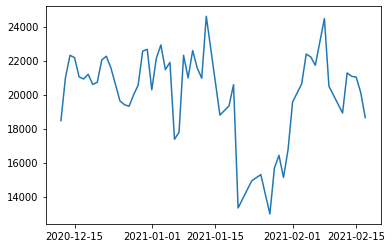

In [ ]:
plt.plot(daily_data_filtered['power'].rolling(window=2).mean())

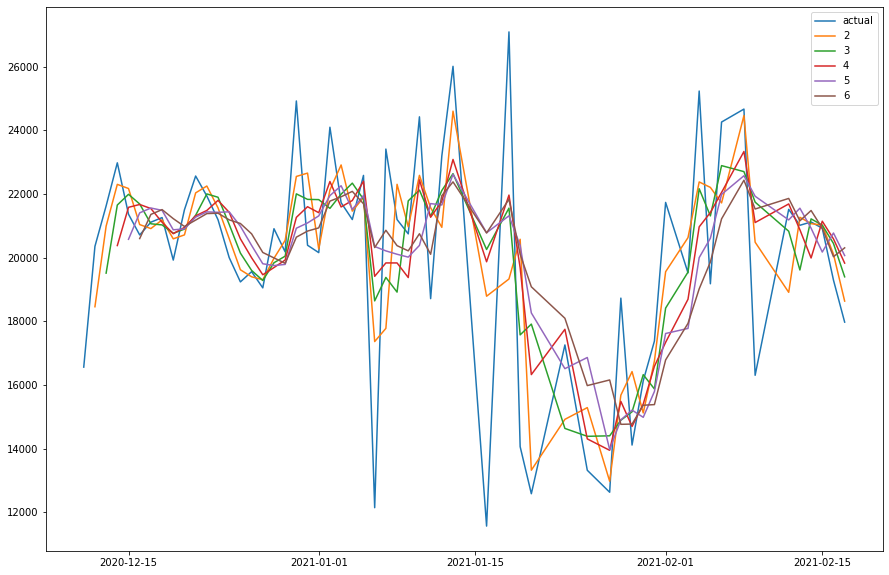

In [ ]:
plt.figure(figsize=(15,10))

plt.plot(daily_data_filtered['power'],label='actual')
plt.plot(daily_data_filtered['power'].rolling(window=2).mean(),label='2')
plt.plot(daily_data_filtered['power'].rolling(window=3).mean(),label='3')
plt.plot(daily_data_filtered['power'].rolling(window=4).mean(),label='4')

plt.plot(daily_data_filtered['power'].rolling(window=5).mean(),label='5')

plt.plot(daily_data_filtered['power'].rolling(window=6).mean(),label='6',)
plt.legend(loc=1)


predicted=0.109188, expected=-0.072865
predicted=0.016136, expected=-0.030973
predicted=-0.014371, expected=0.019180
predicted=-0.028220, expected=0.006843
predicted=-0.001650, expected=-0.064866
predicted=-0.012948, expected=0.076409
predicted=0.006129, expected=0.048032
predicted=0.019858, expected=-0.028196
predicted=0.032081, expected=-0.034565
predicted=-0.004910, expected=-0.057866
predicted=-0.040209, expected=-0.038836
predicted=-0.043755, expected=0.016573
predicted=-0.026710, expected=-0.026354
predicted=-0.016206, expected=0.093072
predicted=0.027764, expected=-0.035486
predicted=0.010411, expected=0.211062
predicted=0.089549, expected=-0.200716
predicted=-0.008380, expected=-0.011464
predicted=-0.000373, expected=0.178519
predicted=-0.011220, expected=-0.103522
predicted=0.021178, expected=-0.024705
predicted=0.016764, expected=0.063349
predicted=-0.021626, expected=-0.620344
predicted=-0.193900, expected=0.656321
predicted=0.033108, expected=-0.099336
predicted=-0.021120, 

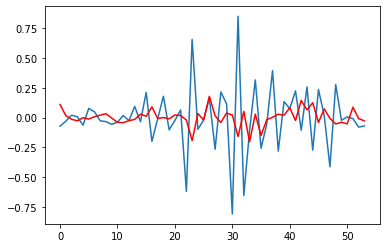

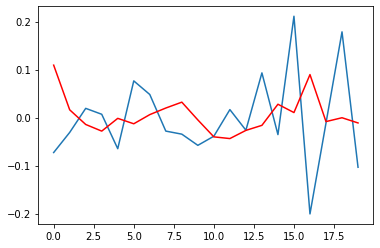

In [128]:
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
# prepare situation
X = daily_data_filtered['power'].dropna()
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[0:20])
pyplot.plot(predictions[0:20], color='red')
pyplot.show()



In [ ]:
plt.plot(gld_close.change)
